In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import random
from networkx.algorithms.approximation import average_clustering

I cannot install utils and decorate, but I have found the source code for decorate. It is given below.

In [2]:
def underride(d, **options):
    for key, val in options.items():
        d.setdefault(key, val)

    return d

def legend(**options):
    underride(options, loc="best", frameon=False)

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, **options)

def decorate(**options):
    loc = options.pop("loc", "best")
    if options.pop("legend", True):
        legend(loc=loc)

    plt.gca().set(**options)
    plt.tight_layout()

In [3]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.10-cp36-none-any.whl size=10186 sha256=a83b6a708287527d6e66adebe20cf74f77019ef54f484633fee2589d3e994822
  Stored in directory: /root/.cache/pip/wheels/c7/07/a3/5fb101329516f5209276247b9d44d163eb485798dcf7419721
Successfully built empiricaldist


In [4]:
!pip install thinkx

     |████████████████████████████████| 51kB 4.6MB/s 
  Created wheel for thinkx: filename=thinkx-1.1.3-cp36-none-any.whl size=59942 sha256=caab9bebf886eefbe38ba560ab32e1163f178facd7ae0ea546ec758f74751b7e
  Stored in directory: /root/.cache/pip/wheels/74/e9/57/f4ad676ba30144b574a6cc36606e82874f8aac8271112f1cd3
Successfully built thinkx


In [5]:
from empiricaldist import Pmf, Cdf

**Exercise 4.3:** The following function reads the file and builds the graph.

In [6]:
import gzip

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

def read_actor_network(filename, n=None):
  G = nx.Graph()
  with gzip.open(filename) as f:
    for i, line in enumerate(f):
      nodes = [int(x) for x in line.split()]
      G.add_edges_from(all_pairs(nodes))
      if n and i >= n:
          break

  return G

Compute the number of actors in the graph and the number of edges.

Check whether this graph has the small world properties, high clustering and low path length.

Plot the PMF of degree on a log-log scale. Does it seem to follow a power law?

Also plot the CDF of degree on a log-x scale, to see the general shape of the distribution, and on a log-log scale, to see whether the tail follows a power law.

Note: The actor network is not connected, so you might want to use nx.connected_components to find connected subsets of the nodes.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving actor.dat.gz to actor.dat.gz


In [8]:
def sample_path_lengths(G, nodes=None, trials=1000):
  if nodes is None:
    nodes = list(G) 
  else:
    nodes = list(nodes) #this if else line simply assigns what will we be sampling;
    #either the entire graph G or the nodes provided.

  pairs = np.random.choice(nodes, (trials,2)) #random nodes assigned with a row for each trial and two columns
  lengths = [nx.shortest_path_length(G, *pair)
             for pair in pairs]
  return lengths

def estimate_path_length(G, nodes=None, trials=1000):
  return np.mean(sample_path_lengths(G, nodes, trials)) #this is pretty straighforward

In [9]:
def degrees(G):
  return [G.degree(u) for u in G]

In [10]:
actors = read_actor_network('actor.dat.gz', n=10000)

In [11]:
print('There are', len(actors), 'actors in the graph. The number of edges, on the other hand, is', nx.number_of_edges(actors))

There are 17540 actors in the graph. The number of edges, on the other hand, is 336377


In [12]:
average_clustering(actors, trials=10000) #The average clustering is high, as shown below

0.7246

As stated from the problem, our data is not connected. We will then be isolating the largest subset and get its path length.

In [13]:
nodez = [len(i) for i in sorted(nx.connected_components(actors), key=len, reverse=True)] #This is a list of sizes of connected components of our actors network in descending order.

In [14]:
nodez[0], nodez[1] #The size of the largest connected component is 17270, and the next largest is 32.

(17270, 32)

In [15]:
for nodes in nx.connected_components(actors):
  if len(nodes) == 17270:
    print(estimate_path_length(actors, nodes)) #The path length is low. Since we have high clustering and low path length, the actors network indeed exhibits a small world property.

3.543


In [16]:
options = dict(ls='', marker='.')

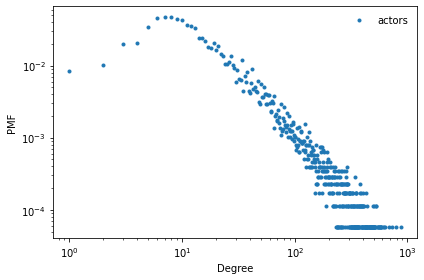

In [17]:
pmf = Pmf.from_seq(degrees(actors), name='actors') #It follows a power law.
pmf.plot(**options)
decorate(xlabel='Degree', ylabel='PMF',
         xscale='log', yscale='log')

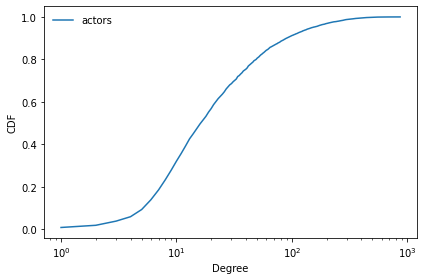

In [18]:
cdf = Cdf.from_seq(degrees(actors), name='actors')
cdf.plot()
decorate(xlabel='Degree', ylabel='CDF', xscale='log')

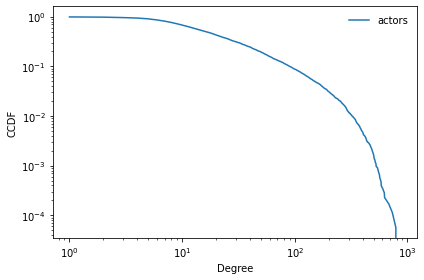

In [19]:
(1-cdf).plot()
decorate(xlabel='Degree', ylabel='CCDF',
                 xscale='log', yscale='log') #The tail follows a power law too.